##Problem 2 - Flowers102 Classification
Note: for the last step, plot the testing accuracy curve across the epochs. To do this, remember to store all the accuracy numbers in a Python list during the training.

In [ ]:
# Flowers102 classification
import torch
import torchvision
from torchvision import transforms

# Define the batch size
batch_size = 10

# Define the transform to normalize the data
# Resize to 224x224 (height x width)
transform = torchvision.transforms.Compose([
    transforms.Resize((224, 224)), # Resize to 224x224 (height x width)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
])

# Load the training set
trainset = torchvision.datasets.Flowers102(root='./data', split='train',
                                        download=True, transform=transform)

# Load the test set
testset = torchvision.datasets.Flowers102(root='./data', split='val',
                                       download=True, transform=transform)

# Create data loaders to load the data in batches
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



In [ ]:
dataiter = iter(testloader)
dataiter

In [ ]:
images, labels = next(dataiter)

In [ ]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Define the model
from torchvision.models import resnet18, ResNet18_Weights

# Using pretrained weights:
net = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1).cuda()

In [ ]:
# Define the loss and the optimizer
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn as nn

epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
scheduler = CosineAnnealingLR(optimizer, epochs, eta_min=0, last_epoch=- 1, verbose=False)

In [ ]:
# Train the network
acc_list = []
loss_list = []
for epoch in range(epochs):  # Loop over the dataset multiple times
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 10 == 0:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    loss_list.append(running_loss)
    scheduler.step()
            
    # Test the network
    net.eval()
    correct = 0
    total = 0
    # Since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()

            # Calculate outputs by running images through the network
            outputs = net(images)

            # The class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc_list.append(100 * correct // total)

    print(f'Accuracy : {100 * correct // total} %')
print('Finished Training')

# Save the model
PATH = './cnn_mnist.pth'
torch.save(net.state_dict(), PATH)

# save the loss and accuracy using pickle
import pickle
with open('loss_list.pkl', 'wb') as f:
    pickle.dump(loss_list, f)
with open('acc_list.pkl', 'wb') as f:
    pickle.dump(acc_list, f)

[1,     1] loss: 0.005
[1,    11] loss: 0.046
[1,    21] loss: 0.043
[1,    31] loss: 0.035
[1,    41] loss: 0.031
[1,    51] loss: 0.028
[1,    61] loss: 0.028
[1,    71] loss: 0.023
[1,    81] loss: 0.024
[1,    91] loss: 0.021
[1,   101] loss: 0.018
Accuracy : 33 %
[2,     1] loss: 0.001
[2,    11] loss: 0.008
[2,    21] loss: 0.008
[2,    31] loss: 0.010
[2,    41] loss: 0.007
[2,    51] loss: 0.007
[2,    61] loss: 0.007
[2,    71] loss: 0.007
[2,    81] loss: 0.005
[2,    91] loss: 0.006
[2,   101] loss: 0.005
Accuracy : 60 %
[3,     1] loss: 0.000
[3,    11] loss: 0.002
[3,    21] loss: 0.002
[3,    31] loss: 0.002
[3,    41] loss: 0.002
[3,    51] loss: 0.002
[3,    61] loss: 0.002
[3,    71] loss: 0.002
[3,    81] loss: 0.001
[3,    91] loss: 0.002
[3,   101] loss: 0.001
Accuracy : 65 %
[4,     1] loss: 0.000
[4,    11] loss: 0.001
[4,    21] loss: 0.001
[4,    31] loss: 0.000
[4,    41] loss: 0.001
[4,    51] loss: 0.001
[4,    61] loss: 0.001
[4,    71] loss: 0.001
[4,    81

In [ ]:
# Plot the testing accuracy curve across the epochs
# Remember to store all the accuracy numbers in a Python list during the training.

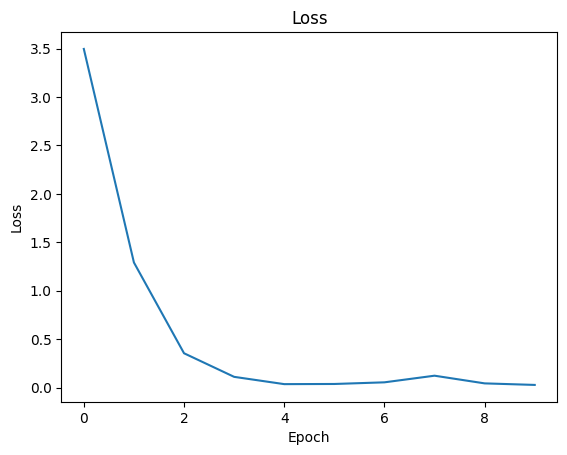

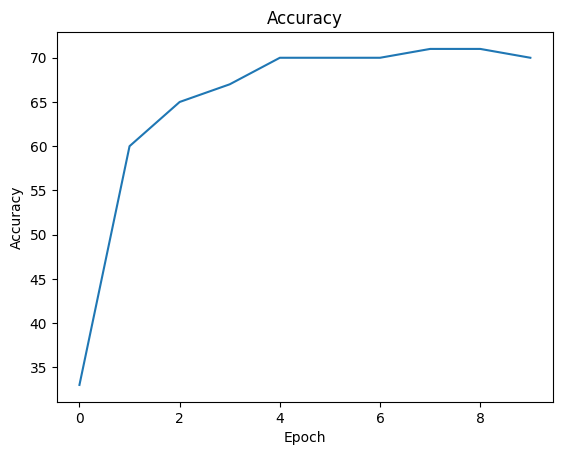

In [ ]:
# load the loss and accuracy from pickle
import pickle
with open('loss_list.pkl', 'rb') as f:
    loss_list = pickle.load(f)
with open('acc_list.pkl', 'rb') as f:
    acc_list = pickle.load(f)

# plot the loss and accuracy
import matplotlib.pyplot as plt
plt.figure()
plt.plot(loss_list)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('loss.png')

plt.figure()
plt.plot(acc_list)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('accuracy.png')